In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns




In [2]:

# Set up visualization aesthetics
sns.set(style="whitegrid")

# Define the file path (Update this to your file path)
file_path = 'C:/Users/User/Desktop/Github/Data_Warehouse_ForEthioMedical/telegram_data.csv'

# Load the dataset
df = pd.read_csv(file_path)

# Display the first few rows of the dataset
df.head()




,Channel Title,Channel Username,ID,Message,Date,Media Path
0,Doctors Ethiopia,DoctorsET,864,https://youtu.be/5DBoEm-8kmA?si=LDLuEecNfULJVD...,2023-12-18 17:04:02+00:00,NaN
1,Doctors Ethiopia,DoctorsET,863,ዶክተርስ ኢትዮጵያ በ አዲስ አቀራረብ በ ቴሌቪዥን ፕሮግራሙን ለመጀመር ከ...,2023-11-03 16:14:39+00:00,NaN
2,Doctors Ethiopia,DoctorsET,862,ሞት በስኳር \n\nለልጆቻችን የምናሲዘው ምሳቃ ሳናቀው እድሚያቸውን ይቀን...,2023-10-02 16:37:39+00:00,NaN
3,Doctors Ethiopia,DoctorsET,861,ከ HIV የተፈወሰ ሰው አጋጥሟችሁ ያቃል ? ፈውስ እና ህክምና ?\n\nሙ...,2023-09-16 07:54:32+00:00,NaN
4,Doctors Ethiopia,DoctorsET,860,በቅርብ ጊዜ በሃገራችን ላይ እየተስተዋለ ያለ የተመሳሳይ ፆታ ( Homos...,2023-09-01 16:16:15+00:00,NaN


In [3]:
# Clean and rename columns as needed
df.rename(columns={
    'Channel Title': 'Channel_Title',
    'Channel Username': 'Channel_Username',
    'ID': 'ID',
    'Message': 'Message',
    'Date': 'Date',
    'Media Path': 'Media_Path'
}, inplace=True)

# Drop duplicates
df.drop_duplicates(inplace=True)

# Handle missing values (fill with 'Unknown')
df.fillna('Unknown', inplace=True)

# Convert all text columns to lowercase
df = df.applymap(lambda s: s.lower() if type(s) == str else s)

# Display the cleaned data
df.head()



,Channel_Title,Channel_Username,ID,Message,Date,Media_Path
0,doctors ethiopia,doctorset,864,https://youtu.be/5dboem-8kma?si=ldlueecnfuljvd...,2023-12-18 17:04:02+00:00,unknown
1,doctors ethiopia,doctorset,863,ዶክተርስ ኢትዮጵያ በ አዲስ አቀራረብ በ ቴሌቪዥን ፕሮግራሙን ለመጀመር ከ...,2023-11-03 16:14:39+00:00,unknown
2,doctors ethiopia,doctorset,862,ሞት በስኳር \n\nለልጆቻችን የምናሲዘው ምሳቃ ሳናቀው እድሚያቸውን ይቀን...,2023-10-02 16:37:39+00:00,unknown
3,doctors ethiopia,doctorset,861,ከ hiv የተፈወሰ ሰው አጋጥሟችሁ ያቃል ? ፈውስ እና ህክምና ?\n\nሙ...,2023-09-16 07:54:32+00:00,unknown
4,doctors ethiopia,doctorset,860,በቅርብ ጊዜ በሃገራችን ላይ እየተስተዋለ ያለ የተመሳሳይ ፆታ ( homos...,2023-09-01 16:16:15+00:00,unknown


In [4]:
# Get basic statistics about the dataset
df.describe(include='all')


,Channel_Title,Channel_Username,ID,Message,Date,Media_Path
count,2094,2094,2094.000000,2094,2094,2094
unique,2,2,NaN,768,1004,1693
top,lobelia pharmacy and cosmetics,lobelia4cosmetics,NaN,unknown,2024-10-08 04:35:59+00:00,unknown
freq,1291,1291,NaN,243,25,402
mean,NaN,NaN,7432.702483,NaN,NaN,NaN
std,NaN,NaN,5532.697310,NaN,NaN,NaN
min,NaN,NaN,1.000000,NaN,NaN,NaN
25%,NaN,NaN,561.250000,NaN,NaN,NaN
50%,NaN,NaN,11377.500000,NaN,NaN,NaN
75%,NaN,NaN,11906.750000,NaN,NaN,NaN


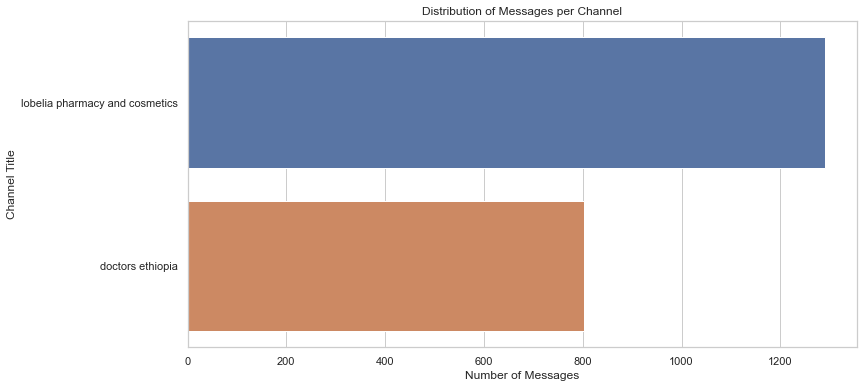

In [5]:
# Count the number of messages per channel
message_counts = df['Channel_Title'].value_counts().reset_index()
message_counts.columns = ['Channel_Title', 'Message_Count']

# Plot the distribution of messages per channel
plt.figure(figsize=(12, 6))
sns.barplot(x='Message_Count', y='Channel_Title', data=message_counts)
plt.title('Distribution of Messages per Channel')
plt.xlabel('Number of Messages')
plt.ylabel('Channel Title')
plt.show()




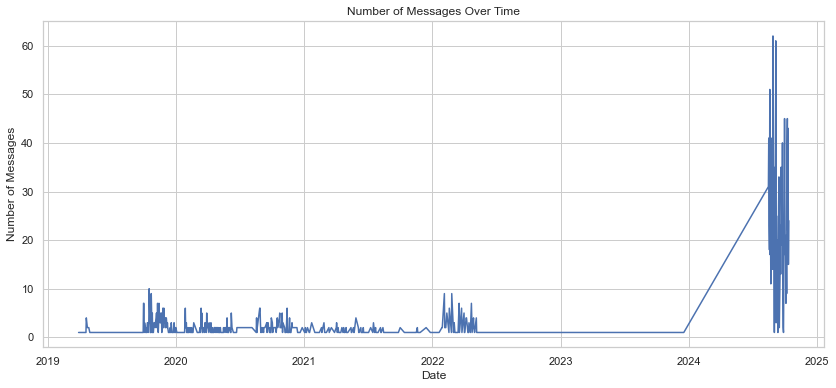

In [6]:
# Convert 'Date' column to datetime
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

# Drop rows where date conversion failed
df = df.dropna(subset=['Date'])

# Plot the number of messages over time
plt.figure(figsize=(14, 6))
df['Date'].dt.date.value_counts().sort_index().plot(kind='line')
plt.title('Number of Messages Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Messages')
plt.show()


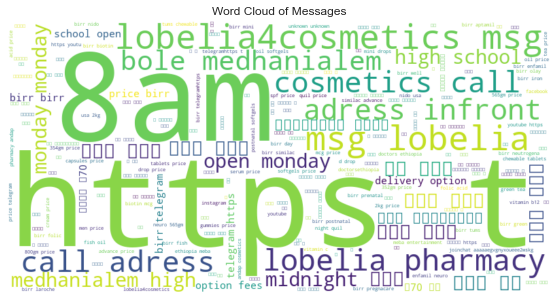

In [10]:
from collections import Counter
from wordcloud import WordCloud

# Combine all messages into a single string
all_messages = ' '.join(df['Message'])

# Generate a word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_messages)

# Plot the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Messages')
plt.show()


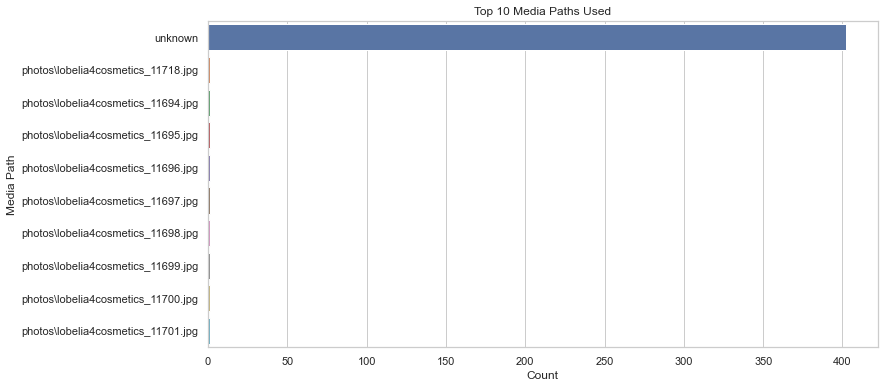

In [8]:
# Count unique media paths
media_path_counts = df['Media_Path'].value_counts().head(10)

# Plot the top 10 media paths used
plt.figure(figsize=(12, 6))
sns.barplot(x=media_path_counts.values, y=media_path_counts.index)
plt.title('Top 10 Media Paths Used')
plt.xlabel('Count')
plt.ylabel('Media Path')
plt.show()


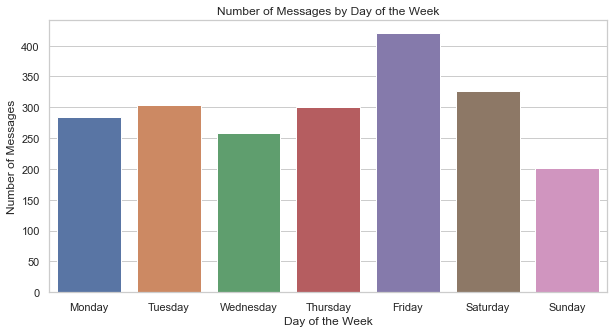

In [9]:
# Extract the day of the week from the 'Date' column
df['Day_of_Week'] = df['Date'].dt.day_name()

# Plot the number of messages for each day of the week
plt.figure(figsize=(10, 5))
sns.countplot(x='Day_of_Week', data=df, order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.title('Number of Messages by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Messages')
plt.show()
